In [1]:
import pandas as pd
import csv
from IPython.display import Image
from IPython.display import display

df = pd.read_csv('twitter_topic_utf16_0713.csv', encoding = 'UTF-16LE', sep=',',index_col=0)
#display(df)
selectid = df.loc[df['topicid'] == 1]
topic1 = pd.DataFrame(selectid, columns = ['created_time','topicid'])
topic1.index=range(len(topic1))
topic1['created_time'] = pd.to_datetime(topic1['created_time'])
#type(topic1['created_time'][0])
#topic1.created_time = pd.to_datetime(topic1.created_time, unit='s')
#topic1['created_time']=topic1['created_time'].astype('datetime64[ns]')
df_count = topic1.set_index('created_time').resample('1D', how='count')
df_count.columns = ['count']
#M #D #H #T #S
df_count['counter name']='#topic1'
#df_count = topic1.resample('1D', how='count')
#df_count.index=range(len(df_count))
df_count['interval start time'] = df_count.index
import datetime
c=(df_count['interval start time'][1]-df_count['interval start time'][0]).total_seconds()
df_count['interval duration in sec.']=c
df_count.index=range(len(df_count))
#display(df_count)
#df_count['interval start time'].astype(str)
df_count['interval start time']=df_count['interval start time'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_count.to_csv('./example/trend_detection_topic1.csv', encoding='UTF-8',header=None,index=False,columns = ['interval start time','interval duration in sec.','count'])
#print(df_count['interval start time'][0])
display(df_count.head(3))

/Users/chiachienhung/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()


,count,counter name,interval start time,interval duration in sec.
0,2,#topic1,2017-02-23 00:00:00,86400.0
1,2,#topic1,2017-02-24 00:00:00,86400.0
2,0,#topic1,2017-02-25 00:00:00,86400.0


In [2]:
#https://github.com/tw-ddis/Gnip-Trend-Detection
#%%bash 
#cat example/trend_detection_topic1.csv | trend_analyze.py -c example/config_poisson.cfg > example/topic1_analyzed_poisson.csv
import gnip_trend_detection
import os
os.system("cat example/trend_detection_topic1.csv | trend_analyze.py -c example/config_poisson.cfg > example/topic1_analyzed_poisson.csv")
os.system("cat example/trend_detection_topic1.csv | trend_analyze.py -c example/config_MannKendall.cfg > example/topic1_analyzed_MannKendall.csv")
os.system("cat example/trend_detection_topic1.csv | trend_analyze.py -c example/config_LinearRegressionModel.cfg > example/topic1_analyzed_LinearRegressionModel.csv")

0

In [3]:
headers = ['interval start time','count','result']
poisson=pd.read_csv('./example/topic1_analyzed_Poisson.csv', encoding = 'UTF-8', sep=',',names=headers)
lr=pd.read_csv('./example/topic1_analyzed_LinearRegressionModel.csv', encoding = 'UTF-8', sep=',',names=headers)
mannkendall=pd.read_csv('./example/topic1_analyzed_MannKendall.csv', encoding = 'UTF-8', sep=',',names=headers)
display(poisson.head(3))
display(mannkendall.head(3))
display(lr.head(3))

,interval start time,count,result
0,2017-02-23 00:00:00,2.0,0.00
1,2017-02-24 00:00:00,2.0,0.00
2,2017-02-25 00:00:00,0.0,0.33


,interval start time,count,result
0,2017-02-23 00:00:00,2.0,0.0
1,2017-02-24 00:00:00,2.0,0.0
2,2017-02-25 00:00:00,0.0,0.0


,interval start time,count,result
0,2017-02-23 00:00:00,2.0,0.0
1,2017-02-24 00:00:00,2.0,0.0
2,2017-02-25 00:00:00,0.0,0.0


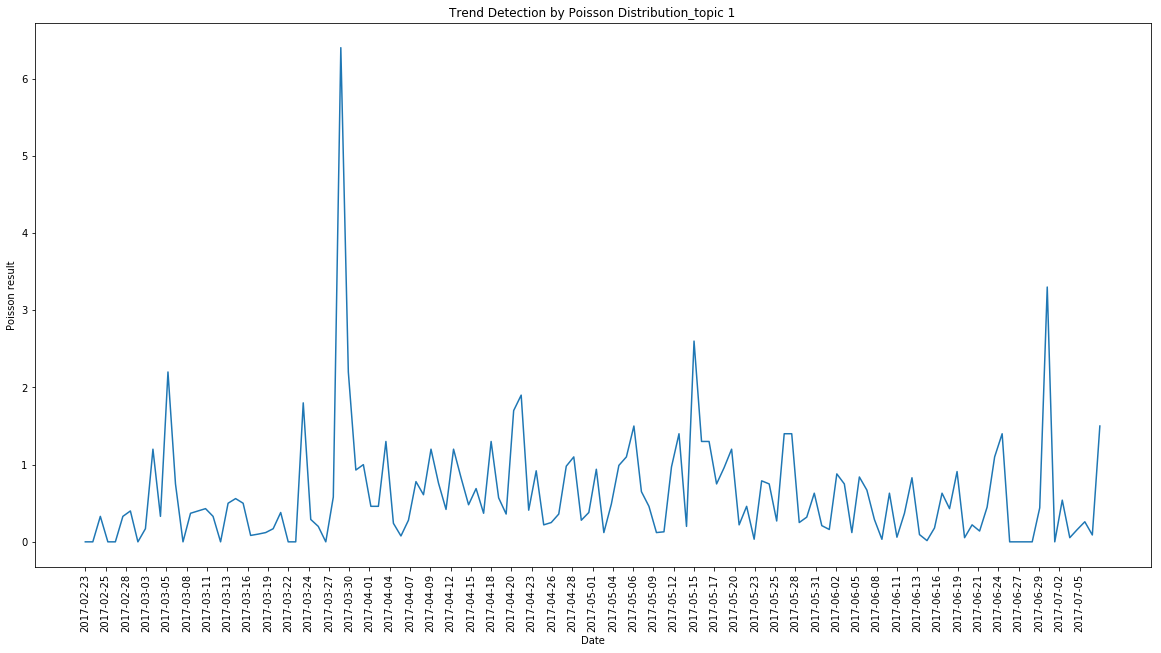

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as DT
poisson['interval start time'] = pd.to_datetime(poisson['interval start time']).dt.strftime('%Y-%m-%d')
#df['Date'] = df['Date'].map(lambda x: datetime.strptime(str(x), '%Y/%m/%d %H:%M:%S.%f'))
poisson['interval start time'] = pd.to_datetime(poisson['interval start time'])
x = poisson['interval start time']
y1 = poisson['result']
# plot

#
#plt.xticks(np.arange(min(x), max(x)))
# beautify the x-labels
#plt.gcf().autofmt_xdate()
fig, ax = plt.subplots(figsize=(20,10))
#fig, ax = plt.figure(figsize=(15,10))
#ax.plot(x,y)
plt.plot(x,y1)
#plt.plot(x, y1, 'r--', x, y2, 'bs', x, y3, 'g^')
plt.xlabel('Date')
plt.ylabel('Poisson result')
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end))
#ylims = ax.get_ylim()
#ax.set_yticks(ylims)
ax.xaxis.set_ticks(np.arange(min(x), max(x), (max(x)-min(x))/50))
#xlims = ax.get_xlim()
#ax.set_xticks(xlims)
#plt.gcf().autofmt_xdate()
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.title('Trend Detection by Poisson Distribution_topic 1')
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
#plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

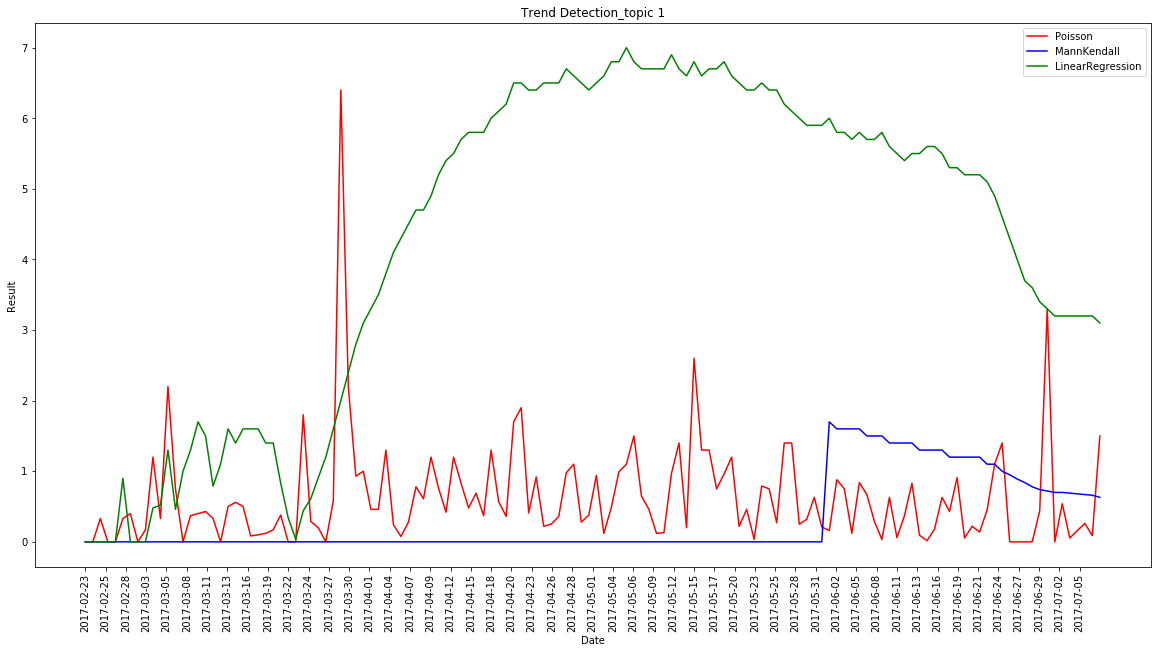

In [5]:
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as DT
#headers = ['interval start time','count','result']
#poisson=pd.read_csv('./example/topic1_analyzed_Poisson.csv', encoding = 'UTF-8', sep=',',names=headers)
#display(df.head(3))
poisson['interval start time'] = pd.to_datetime(poisson['interval start time']).dt.strftime('%Y-%m-%d')
#df['Date'] = df['Date'].map(lambda x: datetime.strptime(str(x), '%Y/%m/%d %H:%M:%S.%f'))
poisson['interval start time'] = pd.to_datetime(poisson['interval start time'])
x = poisson['interval start time']
y1 = poisson['result']
y2 = lr['result']
y3 = mannkendall['result']
fig, ax = plt.subplots(figsize=(20,10))
#fig, ax = plt.figure(figsize=(15,10))
#ax.plot(x,y)
#plt.plot(x,y)
plt.plot(x, y1, color='r',label='Poisson')
plt.plot(x, y2, 'b',label="MannKendall")
plt.plot(x, y3, 'g',label='LinearRegression')

plt.xlabel('Date')
plt.ylabel('Result')
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end))
#ylims = ax.get_ylim()
#ax.set_yticks(ylims)
ax.xaxis.set_ticks(np.arange(min(x), max(x), (max(x)-min(x))/50))
#xlims = ax.get_xlim()
#ax.set_xticks(xlims)
#plt.gcf().autofmt_xdate()
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.title('Trend Detection_topic 1')
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
#plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [6]:
#import configparser
import pandas as pd
import numpy as np
import csv
import json
count=pd.read_csv('./example/topic1_analyzed_Poisson.csv', encoding = 'UTF-8', sep=',',header=None)
#count=pd.read_csv('./example/topic1_analyzed_MannKendall.csv', encoding = 'UTF-8', sep=',',header=None)
#count=pd.read_csv('./example/topic1_analyzed_LinearRegressionModel.csv', encoding = 'UTF-8', sep=',',header=None)
count.columns = ['date','count','poisson']
#count.columns = ['date','count','MannKendall']
#count.columns = ['date','count','LinearRegressionModel']
count['date'] = pd.to_datetime(count['date']).dt.strftime('%Y-%m-%d')
k=[]
for i in range(len(count)):
    freq_dict={}
    freq_dict['date']=count['date'][i]
    freq_dict['count']=str(int(count['count'][i]))
    freq_dict['poisson']=count['poisson'][i]
    #freq_dict['MannKendall']=count['MannKendall'][i]
    #freq_dict['LinearRegressionModel']=count['LinearRegressionModel'][i]
    k.append(freq_dict)
#print(json.dumps(k))